<a href="https://colab.research.google.com/github/KhuyenLE-maths/Alexnet_model_with_image_classification/blob/main/Alexnet_and_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Alexnet** is a convolutional neural network that was designed by Alex Krizhevsky, in collaboration with Ilya Sutskever and Geoffrey Hinton. In ImageNet Large Scale Visual Recognition Challenge (ILSVRC) 2010, this network was trained to classify 1.2 million high-resolution images into 1000 different classes. It achieved top-1 and top-5 error rates of 37.5% and 17%, which outperforms state-of-the-art methods at that time [1]. 

The design of Alexnet and LeNet are very similar, but Alexnet is much deeper with more filters per layer. It consists of eight layers: five convolutional layers (some of them are followed by max-pooling layers), two fully connected hidden layers, and one fully connected output layer. Especially, training this network is also feasible in multiple GPUs. In ILSVRC 2012, a variant of this model is trained using some technique to avoid overfititng such as data augmentation, dropout. Consequently, it won the competition with top-5 test error rate of 15.3% was achieved. 

In this project, we are going to discover the architecture of this network, as well as its implementation in Keras platform. We further applied this network for classifying dog and cat images. 

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Deep learning/Alexnet/')

# I. Architechture
The architecture of Alexnet is described in the following figure [1]:

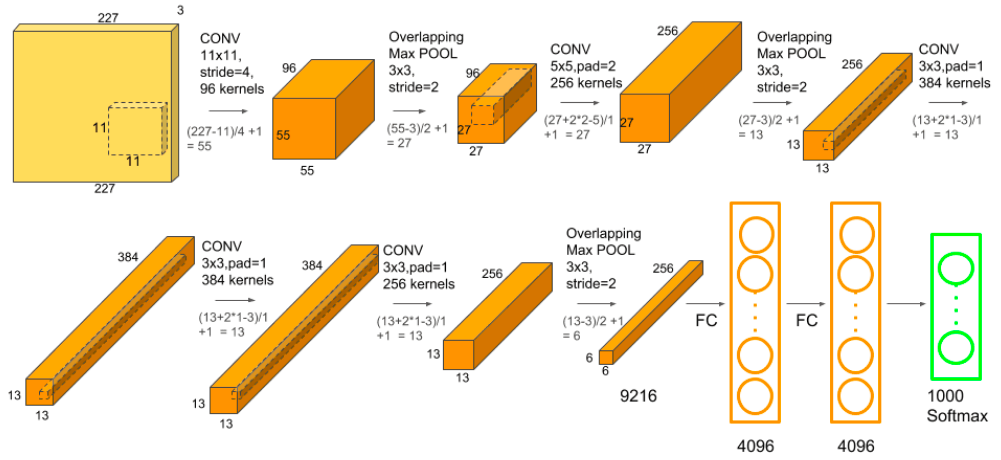

In the first layer, a convolutional window of size 11 × 11 is used. It is because of input size is large, so we need to use a large kernel to capture the object. The convolutional window shape in the next layers is reduced gradually to 5× 5 and 3 × 3, but the number of filters is increased in parallel. The two first and the last convolutional layers are followed by max-pooling layers, where a pooling window size of 3 × 3 and a stride of 2 steps are applied. Hence, the output size is halved through these layers. 

In this model, the ReLU activation function was applied [1]. You can see my previous post for more detail about this function. Besides, the authors also used some techniques to reduce overfitting phenomena, such as data augmentation and dropout. For more detail, the dropout technique was applied in the two first fully connected layers with a dropping ratio is 50%.

Implementation of Alexnet model on Keras:

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# import metric
from keras.metrics import categorical_crossentropy
# optimization method 
from keras.optimizers import SGD

In [ ]:
def Alexnet():
  # Initialize the model
  model = Sequential()

  # layer 1: convolutional layer + max-pooling layer
  model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', activation='relu', input_shape = (227,227,3)))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layer 2: convolutional layer + max-pooling layer 
  model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layers 3-5: three convolutional layers + 1 max-pooling layer
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layers 6 - 8: two fully connected hidden layers and one fully connected output layer
  model.add(Flatten())
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(1000, activation = 'softmax'))

  # compile the model with a loss funciton, a metric and and optimizer method for estimating the loss function
  opt = SGD(lr = 0.1)
  model.compile(loss = categorical_crossentropy,
                optimizer = opt,
                metrics = ['accuracy'])

  return model

In [ ]:
Alexnet_model = Alexnet()

In [ ]:
Alexnet_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       8

***This model has more than 62 millions parameters.***

## II. Application Alexnet model to dog and cat classification
The dataset is collected from Kaggle, this data consists of a training set and a test set: 
- Training set includes 4006 images of dogs and 4001 images of cats.
- Testing set includes 1013 images of dog and 1012 images of cats. 


### 1. Data loading and exploration

In [ ]:
train_path = os.getcwd() + '/' + 'training_set/training_set/' 
test_path = os.getcwd() + '/' + 'test_set/test_set/'

In [ ]:
print('The training set consists of ', len(os.listdir(train_path + 'dogs/')), ' dog images and ', len(os.listdir(train_path + 'cats/')), ' cat images.' )

The training set consists of  4006  dog images and  4001  cat images.


In [ ]:
print('The test set consists of ', len(os.listdir(test_path + 'dogs/')), ' dog images and ', len(os.listdir(test_path + 'cats/')), ' cat images.' )

The test set consists of  1013  dog images and  1012  cat images.


Load images and labels 

In [ ]:
import cv2
from PIL import Image
import numpy as np

In [ ]:
cates = ['dogs', 'cats']
def load_images_and_labels(data_path, cates): 
  X = []
  y = []
  i = 0
  for index, cate in enumerate(cates): 
    for img_name in os.listdir(data_path + cate + '/'):
      i = i +1
      print(i)
      img = cv2.imread(data_path + cate + '/' + img_name)
      if img is not None: 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_array = Image.fromarray(img, 'RGB')
        # resize image to 227x227 which is the required input size of the Alexnet model
        img_rs = img_array.resize((227,227))
        # convert the image to array
        img_rs = np.array(img_rs)
      
        X.append(img_rs)
        y.append(index)
  return X, y

Load the training data 

In [ ]:
X_train, y_train = load_images_and_labels(train_path, cates)

Load the test set

In [ ]:
X_test, y_test = load_images_and_labels(test_path, cates)

In [ ]:
print('Training size: ', len(X_train), 'Testing size: ', len(X_test))

Save X_train, y_train, X_test, y_test

In [ ]:
data_dict = {'X_train' : X_train, 
             'y_train': y_train, 
             'X_test': X_test, 
             'y_test': y_test}
np.save('data_dict.npy', data_dict)

Load X_train, y_train, X_test, y_test

In [ ]:
data_dict_ = np.load('data_dict.npy', allow_pickle = 'True').item()
X_train = data_dict_['X_train']
y_train = data_dict_['y_train']
X_test = data_dict_['X_test']
y_test = data_dict_['y_test']

Display randomly some images of the training set: 

In [ ]:
import matplotlib.pyplot as plt
import random

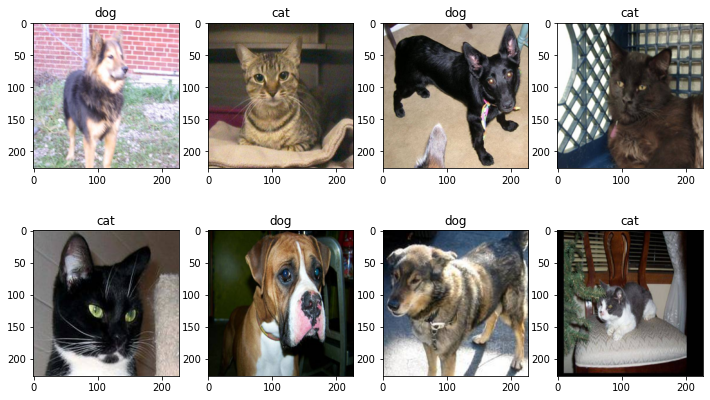

In [ ]:
plt.figure(figsize = (12,7))
cate = ['dog', 'cat']
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(cate[y_train[ind]])

### 2. Data preprocessing

This task consists of the following steps: 
- Convert integer values into floats
- Normalization
- One-hot encoding 

In [ ]:
from keras.utils import to_categorical

In [ ]:
def preprocess_data(X, y):
  # convert X from list to array
  X = np.array(X)
  
  # convert integer values of X into floats
  X = X.astype(np.float32)

  # normalization 
  X = X/255.0
  
  # one-hot encoding the labels 
  y = to_categorical(np.array(y))
    
  return X, y

In [ ]:
(X_train, y_train) = preprocess_data(X_train, y_train)

In [ ]:
(X_test, y_test) = preprocess_data(X_test, y_test)

Visualize some images of the training set after preprocessing: 

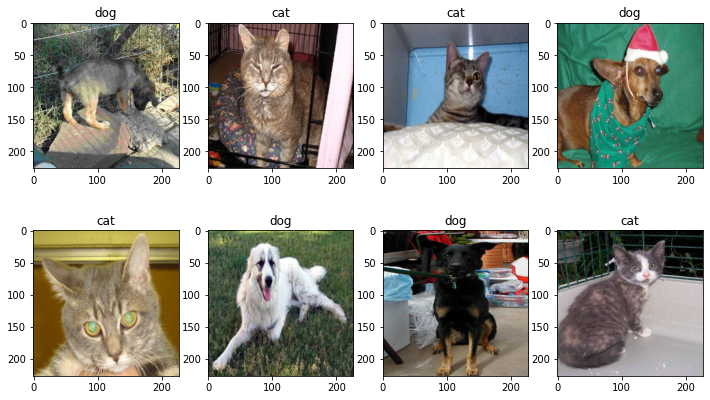

In [ ]:
plt.figure(figsize = (12,7))
for i in range(8):
  ind = random.randint(0, len(X_train))
  plt.subplot(240 + 1 + i)
  plt.imshow(X_train[ind])
  plt.title(cate[np.argmax(y_train[ind])])

### 3. Define the Alexnet model
Remark that the output number in this case is two, which is corresponding to the number of classes 

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
# metric
from keras.metrics import binary_crossentropy
# optimization method (Stochastic Gradient Descent (SGD))
from keras.optimizers import SGD

In [ ]:
def Alexnet():
  # Initialize the model
  model = Sequential()

  # layer 1: convolutional layer + max-pooling layer
  model.add(Conv2D(filters = 96, kernel_size = (11,11), strides= 4, padding = 'valid', activation='relu', input_shape = (227,227,3)))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layer 2: convolutional layer + max-pooling layer 
  model.add(Conv2D(filters = 256, kernel_size = (5,5), padding = 'same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layers 3-5: three convolutional layers + 1 max-pooling layer
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(filters = 384, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
  model.add(MaxPooling2D(pool_size = (3,3), strides = 2))

  # layers 6 - 8: two fully connected hidden layers and one fully connected output layer
  model.add(Flatten())
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(4096, activation = 'relu'))
  model.add(Dropout(0.5))
  model.add(Dense(2, activation = 'softmax'))

  # compile the model with a loss funciton, a metric and and optimizqation method
  opt = SGD(lr = 0.1)
  model.compile(loss = binary_crossentropy,
                optimizer = opt,
                metrics = ['accuracy'])

  return model

In [ ]:
Alexnet_model = Alexnet()
Alexnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 13, 13, 256)      

### 4. Train the model
In this section, we apply data augementation techniques to reduce overfitfing, including rotation the image of 5 degrees, width shift range is 0.1, height shift range is 0.1 and horieontal flip. These techniques can be affected thanks to the ***ImageDataGenerator*** function from the ***keras.preprocessin.image*** module. 

Define the training function: 

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

In [ ]:
def train_model(model, X_train, y_train, X_test, y_test, epochs, batch_size):
  # Data generator
  datagen = ImageDataGenerator(rotation_range = 5, width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
  # iteration on the training set
  it_train = datagen.flow(X_train, y_train, batch_size = batch_size)
  # path to save checkpoint 
  path_cp = os.getcwd() + '/' + 'weights_.hdf5'
  checkpoint_ = ModelCheckpoint(path_cp, monitor = 'loss', save_best_only = True, mode = 'auto')
  steps = X_train.shape[0]//batch_size
  # Fitting the model
  history = model.fit_generator(it_train, epochs = epochs, steps_per_epoch = steps, 
                                validation_data = (X_test, y_test), verbose = 1, 
                                callbacks = checkpoint_)
  # Evaluating the model
  _, acc = model.evaluate(X_test, y_test, verbose = 1)
  print('%.3f' % (acc * 100.0))
  
  return history, acc

In [ ]:
train_history, acc = train_model(Alexnet_model, X_train, y_train, X_test, y_test, epochs = 100, batch_size = 128)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
62/62 [==============================] - 117s 2s/step - loss: 0.6932 - accuracy: 0.5027 - val_loss: 0.6914 - val_accuracy: 0.5230
Epoch 2/100
62/62 [==============================] - 116s 2s/step - loss: 0.6911 - accuracy: 0.5344 - val_loss: 0.6877 - val_accuracy: 0.5245
Epoch 3/100
62/62 [==============================] - 116s 2s/step - loss: 0.6874 - accuracy: 0.5460 - val_loss: 0.6846 - val_accuracy: 0.5699
Epoch 4/100
62/62 [==============================] - 116s 2s/step - loss: 0.6902 - accuracy: 0.5269 - val_loss: 0.6862 - val_accuracy: 0.5393
Epoch 5/100
62/62 [==============================] - 116s 2s/step - loss: 0.6860 - accuracy: 0.5563 - val_loss: 0.7487 - val_accuracy: 0.5002
Epoch 6/100
62/62 [==============================] - 116s 2s/step - loss: 0.6918 - accuracy: 0.5459 - val_loss: 0.6678 - val_accuracy: 0.6144
Epoch 7/100
62/62 [==============================] - 116s 2s/step - loss: 0.6992 - accuracy: 0.5144 - val_loss: 0.6793 - val_accuracy: 0.5976
Epoch 

Save the training history and the accuracy

In [ ]:
import pandas as pd

In [ ]:
# convert the history.history dict to a pandas DataFrame:     
train_hist_df = pd.DataFrame(train_history.history) 

train_dict = {'train_hist': train_hist_df, 
              'acc': acc}
np.save('train_dict.npy', train_dict)         

Save the trained Alexnet_model

In [ ]:
Alexnet_model.save('Alexnet_model.h5')

In [ ]:
def plot_accuracy(history):
  plt.figure(figsize = (10,6))
  plt.plot(history.history['accuracy'], color = 'blue', label = 'train')
  plt.plot(history.history['val_accuracy'], color = 'red', label = 'val')
  plt.legend()
  plt.title('Accuracy')
  plt.show()

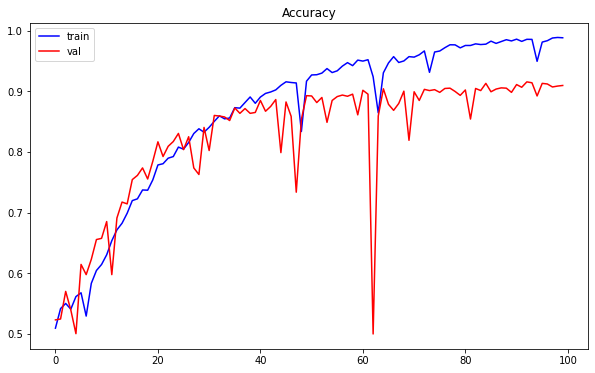

In [ ]:
plot_accuracy(train_history)

We see that the accuracies on both sets tend to increase (up to 98.85% for the training set and 90.95 % for the testing set) as the number of epochs increases. These values can still be improved with a higher number of epochs.

### 5. Prediction

In [ ]:
y_test_pred = []
for i in np.arange(len(X_test)):
  img = X_test[i]
  img = img.reshape(1, 227, 227, 3)
  y_p = Alexnet_model.predict(img)
  y_test_pred.append(y_p)

y_test_pred = np.asarray(y_test_pred)

Determine the confusion matrix 

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

Reverse the true and the predicted labels into the original binary labels (0 and 1) to compute the confusion matrix

In [ ]:
y_test_labels = [np.argmax(vect) for vect in y_test]
y_test_pred_labels = [np.argmax(vect) for vect in y_test_pred]

Text(69.0, 0.5, 'True classes')

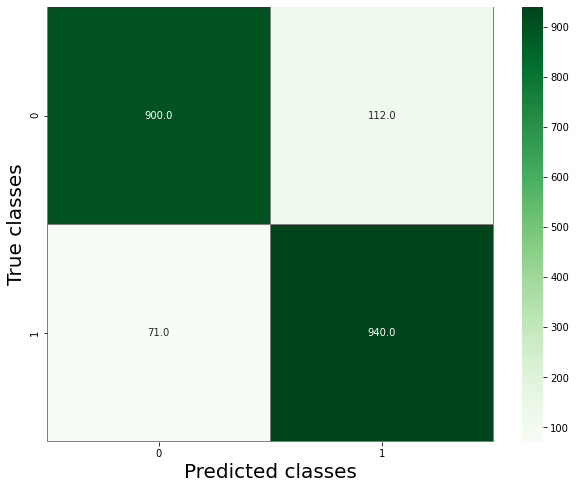

In [ ]:
conf_mat = confusion_matrix(y_test_labels, y_test_pred_labels)

plt.figure(figsize = (10,8))
sns.heatmap(conf_mat, linewidths = 0.1, cmap = 'Greens', linecolor = 'gray', fmt = '.1f', annot = True)
plt.xlabel('Predicted classes', fontsize = 20)
plt.ylabel('True classes', fontsize = 20)

This matrix describes the number of images that are correctly or incorrectly classified in each class. Based on this matrix, we see that:
- 900 dog images and 940 cat images are classified correctly in their classes.
- 112 dog images are classified into the “cat” class.
- 71 cat images are classified into the “dog” class.

Visualize some images and their predicted classes:

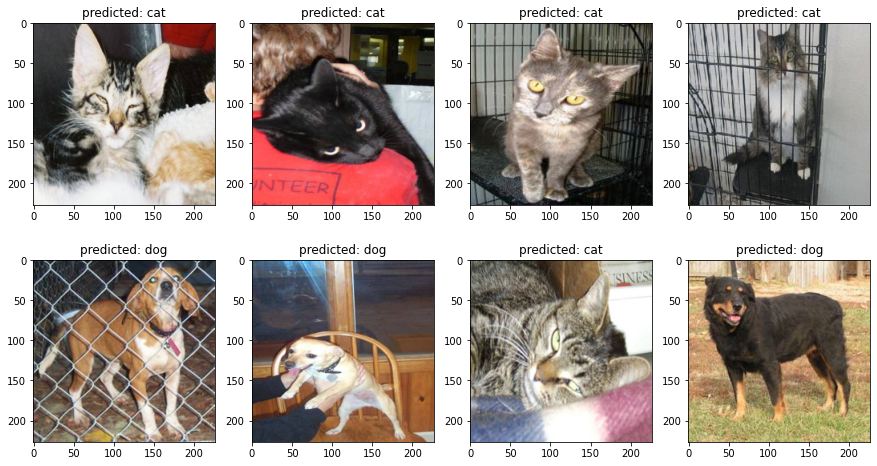

In [ ]:
plt.figure(figsize = (15,8))
for i in np.arange(8):
  # take randomly in indice
  ind = random.randint(0, len(X_test))
  img = X_test[ind]
  # resize the image 
  img_rs = img.reshape(1,227,227,3)
  # predict the label of img
  y_pred = Alexnet_model.predict(img_rs)
  # determine the corresponding category
  predicted_cate = cate[np.argmax(y_pred)]
  plt.subplot(240+1+i)
  plt.imshow(img)
  plt.title('predicted: ' + str(predicted_cate))

# III. Conclusion
We have discovered the architecture of the Alexnet model and its implementation on the Keras platform. This model is applied for classifying dog and cat images with a performance of 90.954 % in the testing set is achieved. However, this performance can still be improved by getting more training data, trying a higher number of epochs, changing the hyperparameters, and so on. Besides, there are also some other techniques to improve the model in each particular case, they will be introduced detailly in the next projects.

**References:**

[1] Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). Imagenet classification with deep convolutional neural networks. *Advances in neural information processing systems*, 25, 1097–1105.